Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Command and Control interface
This notebooks shows how to interact with the command&control server to observe the environment and initiate actions on the nodes where the attacker client is installed.

In [2]:
import networkx as nx
from tabulate import tabulate
import cyberbattle.simulation.model as model
import cyberbattle.simulation.actions as actions
import cyberbattle.simulation.commandcontrol as commandcontrol
import importlib
importlib.reload(model)
importlib.reload(actions)
importlib.reload(commandcontrol)
import plotly.offline as plo
plo.init_notebook_mode(connected=True)

We first create a simulation environment from a randomly generated network graph.

In [3]:
g = nx.erdos_renyi_graph(35,0.05,directed=True)
g = model.assign_random_labels(g)
env = model.Environment(network=g, vulnerability_library=dict([]), identifiers=model.SAMPLE_IDENTIFIERS)


We create the `CommandControl` object used to the environment and execute actions, and plot the graph explored so far.


In [4]:
c = commandcontrol.CommandControl(env)

Nodes disovered so far: [{'id': '27', 'status': 'owned'}]


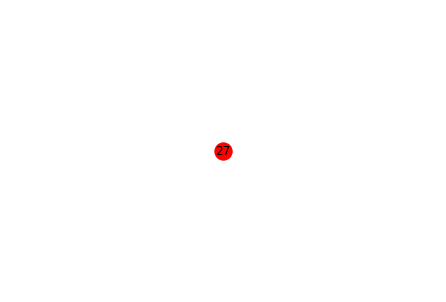

In [5]:
c.plot_nodes()
print("Nodes disovered so far: " + str(c.list_nodes()))
starting_node = c.list_nodes()[0]['id']

For debugging purpose it's also convient to view the internals of the environment via the `EnvironmentDebugging` object. For instance we can use it to plot the entire graph, including nodes that were not discovered yet by the attacker.

In [6]:
dbg = commandcontrol.EnvironmentDebugging(c)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34']
[('0', '2'), ('0', '11'), ('0', '34'), ('2', '23'), ('3', '6'), ('3', '12'), ('3', '23'), ('3', '32'), ('4', '15'), ('5', '19'), ('6', '34'), ('7', '1'), ('7', '23'), ('8', '18'), ('8', '22'), ('8', '30'), ('9', '2'), ('9', '19'), ('10', '1'), ('10', '19'), ('11', '34'), ('12', '3'), ('12', '13'), ('12', '21'), ('13', '26'), ('16', '5'), ('18', '25'), ('19', '10'), ('19', '18'), ('19', '22'), ('19', '30'), ('20', '2'), ('21', '0'), ('21', '17'), ('22', '7'), ('22', '11'), ('22', '28'), ('23', '32'), ('23', '33'), ('24', '7'), ('25', '34'), ('26', '0'), ('26', '11'), ('27', '14'), ('27', '16'), ('29', '6'), ('29', '12'), ('29', '20'), ('29', '33'), ('30', '19'), ('30', '28'), ('30', '33'), ('31', '4'), ('31', '5'), ('32', '16'), ('32', '24'), ('33', '8'), ('33', '13'), ('33', '17')]
Name: 

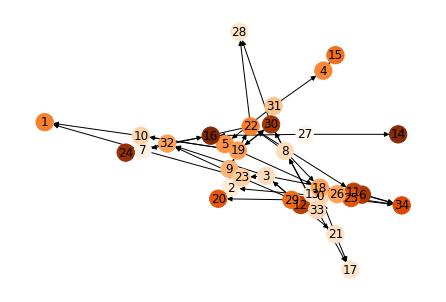

In [7]:
env.plot_environment_graph()
print(nx.info(env.network))

In [8]:
print(tabulate(c.list_all_attacks(),{}))

  id  status    properties                local_attacks                 remote_attacks
----  --------  ------------------------  ----------------------------  ----------------
  27  owned     ['Linux', 'PortRDPOpen']  ['RecentlyAccessedMachines']  []


In [9]:
outcome = c.run_attack(starting_node, 'RecentlyAccessedMachines')
outcome

"['16', '14']"

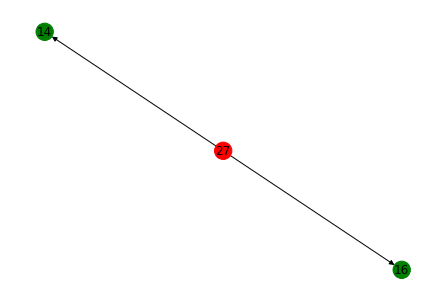

In [10]:
c.plot_nodes()

In [11]:
print(tabulate(c.list_nodes(),{}))

  id  status
----  ----------
  27  owned
  16  discovered
  14  discovered


In [13]:
print(tabulate(c.list_all_attacks(),{}))

  id  status      properties    local_attacks                 remote_attacks
----  ----------  ------------  ----------------------------  ----------------
   6  owned       ['Windows']   ['RecentlyAccessedMachines']  []
  24  discovered                                              []
